# Data visualisation 

## Imports

In [14]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import pandas as pd
import numpy as np
import seaborn as sns
import math

## Read CSV file containing all papers

In [5]:
papers_df = pd.read_csv('../startupjh/papers.csv')

In [6]:
papers_df

,title,year,citations,cited_by_url
0,The path to automation in an RTG terminal,2018,2,https://scholar.google.com.tw/scholar?start=00...
1,Simulation Methodology for Automation of Port ...,2010,0,https://scholar.google.com.tw/scholar?start=00...
2,–Terminal Automation,0,0,https://scholar.google.com.tw/scholar?start=00...
3,A case study of automation management system o...,2017,4,https://scholar.google.com.tw/scholar?start=00...
4,INFORMATION TECHNOLOGY IN PORT CONTAINER TERMI...,0,0,https://scholar.google.com.tw/scholar?start=00...
5,Authentication Technologies of X-ray Inspectio...,2005,0,https://scholar.google.com.tw/scholar?start=00...
6,INFORMATION TECHNOLOGY IN PORT CONTAINER TERMI...,2017,0,https://scholar.google.com.tw/scholar?start=00...
7,A Study on the perception of the subjects abou...,2020,1,https://scholar.google.com.tw/scholar?start=00...
8,Correction to: Alignments between strategic co...,2020,4,https://scholar.google.com.tw/scholar?start=00...
9,An approach for designing robotized marine con...,2004,94,https://scholar.google.com.tw/scholar?start=00...


## Basic visualisation

In [8]:
topic = 'Automation Container Terminal'

### Publications per year

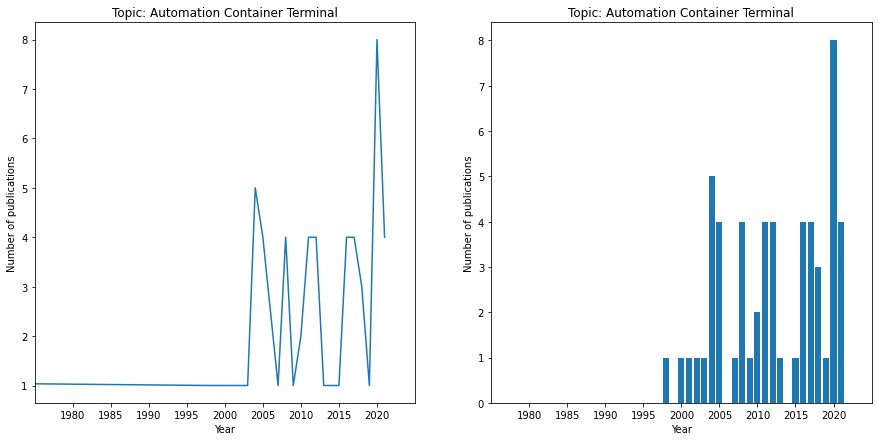

In [9]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.plot(papers_df.groupby("year").count()["title"])
plt.xlabel("Year")
plt.ylabel("Number of publications")
plt.title(f"Topic: {topic}")
plt.xlim((1975,2025))
plt.xticks(np.arange(1980,2025,5))

plt.subplot(1,2,2)
plt.bar(papers_df.groupby("year").count()["title"].index, papers_df.groupby("year").count()["title"])
plt.xlabel("Year")
plt.ylabel("Number of publications")
plt.title(f"Topic: {topic}")
plt.xlim((1975,2025))
plt.xticks(np.arange(1980,2025,5));

In [23]:
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Line Plot: "+f"Topic: {topic}", "Bar Chart: "+f"Topic: {topic}")
)

# Add traces
fig.add_trace(go.Scatter(x=papers_df['year'], y= papers_df.groupby("year").count()["title"]), mode="lines+markers", row=1, col=1)
fig.add_trace(go.Bar(x=papers_df['year'], y= papers_df.groupby("year").count()["title"]), row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Year of Publication", range=[1995, 2021], row=1, col=1)
fig.update_xaxes(title_text="Year of Publication",range=[1995, 2021], row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Publications", row=1, col=1)
fig.update_yaxes(title_text="Number of Publications", row=1, col=2)

# Update title and height
fig.update_layout(title_text= topic, height=700)

TypeError: add_trace() got an unexpected keyword argument 'mode'

### Total citations per year

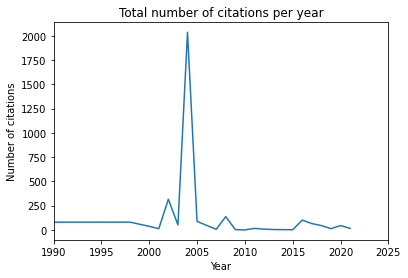

In [10]:
# Plot of total number of citations per year
plt.plot(papers_df.groupby("year").sum().index, papers_df.groupby("year").sum())
plt.xlim((1990, 2025))
plt.title("Total number of citations per year")
plt.xlabel("Year")
plt.ylabel("Number of citations");

### Advanced visualisation (custom atom graph)

In [11]:
# Sorting of dataframe + create "radius" column
sorted_df = papers_df.sort_values(by="citations", ascending = False)
sorted_df["radius"] = (sorted_df["citations"]/314)*2 + 0.5

In [12]:
# Creation of thetas column
n_low_cited  = sorted_df[sorted_df["citations"]<=5].count()[0]
n_mid_cited  = sorted_df[(sorted_df["citations"]>5) & (sorted_df["citations"] <= 20)].count()[0]
n_high_cited = sorted_df[(sorted_df["citations"]>20) & (sorted_df["citations"] <= 100)].count()[0]

theta3 = np.linspace(0, 360, num=n_high_cited, endpoint=False)
theta2 = np.linspace(0, 360, num=n_mid_cited, endpoint=False)
theta1 = np.linspace(0, 360, num=n_low_cited, endpoint=False)

alpha = np.array(0)
thetas = np.hstack((alpha, theta1,theta2, theta3))

sorted_df["thetas"] = thetas

ValueError: Length of values (58) does not match length of index (60)

In [157]:
# Creation of "coeff" column
sorted_df["coeff"] = 0

for i in sorted_df.index:
    if sorted_df.at[i, "citations"] <= 5:
        sorted_df.at[i, 'coeff'] = 8
    elif (sorted_df.at[i, "citations"] > 5) & (sorted_df.at[i, "citations"] <= 20):
        sorted_df.at[i, 'coeff'] = 6
    elif (sorted_df.at[i, "citations"] > 20) & (sorted_df.at[i, "citations"] <= 100):
        sorted_df.at[i, 'coeff'] = 4

In [160]:
# Creation of "x_center" and "y_center" columns
sorted_df["x_center"] = 10
sorted_df["y_center"] = 10

for i in sorted_df.index:
    sorted_df.at[i, 'x_center'] = np.cos(sorted_df.at[i, 'thetas'])*sorted_df.at[i, 'coeff'] + 10
    sorted_df.at[i, 'y_center'] = np.sin(sorted_df.at[i, 'thetas'])*sorted_df.at[i, 'coeff'] + 10
    
sorted_df

,title,year,citations,radius,thetas,coeff,x_center,y_center
51,"Design, simulation, and evaluation of automate...",2002,314,2.500000,0.0,0,10,10
19,Deadlock prevention for automated guided vehic...,2007,80,1.009554,0.0,4,14,10
64,A modelling and simulation methodology for man...,1998,80,1.009554,8.0,4,9,13
48,An ERP approach for container terminal operati...,2003,68,0.933121,16.0,4,6,8
43,Optimisation for job scheduling at automated c...,2013,63,0.901274,24.0,4,11,6
...,...,...,...,...,...,...,...,...
40,Automation of operations in Durres Port Contai...,2012,0,0.500000,160.0,8,2,11
30,Simulation Methodology for Automation of Port ...,2010,0,0.500000,200.0,8,13,3
36,INFORMATION TECHNOLOGY IN PORT CONTAINER TERMI...,2017,0,0.500000,240.0,8,12,17
34,Authentication Technologies of X-ray Inspectio...,2005,0,0.500000,280.0,8,2,6


In [168]:
# Creation of custom "ATOM" graph
# The most cited paper(s) stands in the middle, and least cited papers gravitate around
# The bigger the dot, the more citations
# Colors indicate range of citations
# Problem: the centers (blue dots) are not aligned with the colored circles
# Also, want to change hovering text to Year + Citations (instead of x_center, y_center)

fig = go.Figure(data=go.Scatter(x=sorted_df["x_center"], y=sorted_df["y_center"], mode='markers'))

# Set axes properties
fig.update_xaxes(range=[0, 20], zeroline=False)
fig.update_yaxes(range=[0, 20])

# Add circles
fig.add_shape(type="circle",
    xref="x", yref="y",
    fillcolor="LightSeaGreen",
    x0=8.5, y0=8.5, x1=11.5, y1=11.5,
    line_color="black",
)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=6, y0=6, x1=14, y1=14,
    line_color="black",
)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=4, y0=4, x1=16, y1=16,
    line_color="black",
)
fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=2, y0=2, x1=18, y1=18,
    line_color="black",
)

# Mx = cosØ*r and My = sinØ*r
j = 0
k = 0
l = 0
for i, row in sorted_df[1:].iterrows():
    #print(row.radius)
    theta = randint(0,360)
    if row.citations <= 5:
        theta = theta1[j]
        x_center = np.cos(theta)*8 + 10
        y_center = np.sin(theta)*8 + 10
        color = "orange"
        j = j + 1
    elif row.citations > 5 and row.citations <=20:
        theta = theta2[k]
        x_center = np.cos(theta)*6 + 10
        y_center = np.sin(theta)*6 + 10
        color = "yellow"
        k = k + 1
    elif row.citations > 20 and row.citations <= 100:
        theta = theta3[l]
        x_center = np.cos(theta)*4 + 10
        y_center = np.sin(theta)*4 + 10
        color = "green"
        l = l + 1
    fig.add_shape(type="circle",
    xref="x", yref="y",
    x0=x_center-(row.radius/2), y0=y_center-(row.radius/2), x1=x_center+(row.radius/2), y1=y_center+(row.radius/2),
    fillcolor=color,
    )

# Set figure size
fig.update_layout(width=800, height=800)

fig.show()